### Project Overview  
#### **Objective:**
- Analyze global population trends over the years.
- Identify the top 10 most populous countries based on total population across all years.
- Visualize Region and income based distributions.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

### Loading population Dataset

In [2]:
data= pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv",skiprows=4)  
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [4]:
# Descriptive statistics
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,0.0
mean,1.154480e+08,1.170538e+08,1.192160e+08,1.218878e+08,1.245835e+08,1.273111e+08,1.301581e+08,1.330127e+08,1.359425e+08,1.389705e+08,...,3.004900e+08,3.043329e+08,3.081725e+08,3.119272e+08,3.156080e+08,3.192036e+08,3.223546e+08,3.255235e+08,3.287886e+08,NaN
std,3.626523e+08,3.671660e+08,3.738303e+08,3.824608e+08,3.911397e+08,3.999256e+08,4.091870e+08,4.184361e+08,4.279507e+08,4.378239e+08,...,9.388565e+08,9.499906e+08,9.611259e+08,9.719209e+08,9.824034e+08,9.924599e+08,1.001248e+09,1.009781e+09,1.018589e+09,NaN
min,2.715000e+03,2.970000e+03,3.264000e+03,3.584000e+03,3.922000e+03,4.282000e+03,4.664000e+03,5.071000e+03,5.500000e+03,5.631000e+03,...,1.095400e+04,1.093000e+04,1.086900e+04,1.075100e+04,1.058100e+04,1.039900e+04,1.019400e+04,9.992000e+03,9.816000e+03,NaN
25%,5.152028e+05,5.255230e+05,5.363018e+05,5.475875e+05,5.593638e+05,5.675750e+05,5.711695e+05,5.779525e+05,5.825170e+05,5.861185e+05,...,1.786457e+06,1.777568e+06,1.791019e+06,1.797086e+06,1.788891e+06,1.790152e+06,1.786080e+06,1.803545e+06,1.827816e+06,NaN
50%,3.659633e+06,3.747132e+06,3.831900e+06,3.919710e+06,4.010150e+06,4.102976e+06,4.198738e+06,4.297792e+06,4.396290e+06,4.503420e+06,...,1.035808e+07,1.032545e+07,1.025915e+07,1.028382e+07,1.042338e+07,1.069786e+07,1.050577e+07,1.048694e+07,1.064485e+07,NaN
75%,2.686293e+07,2.761326e+07,2.837302e+07,2.915448e+07,2.995223e+07,3.075921e+07,3.147516e+07,3.203946e+07,3.247057e+07,3.277149e+07,...,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.972908e+07,6.097280e+07,6.283041e+07,6.471182e+07,6.661761e+07,NaN
max,3.021529e+09,3.062769e+09,3.117373e+09,3.184063e+09,3.251253e+09,3.318998e+09,3.389087e+09,3.459014e+09,3.530702e+09,3.604812e+09,...,7.441472e+09,7.528523e+09,7.614114e+09,7.696495e+09,7.776892e+09,7.856139e+09,7.921184e+09,7.989982e+09,8.061876e+09,NaN


### Data Cleaning


In [5]:
data = data.drop(columns=["Unnamed: 68"], errors="ignore")
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0


In [6]:
# Checking missing values
data.isnull().sum() 

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64

In [7]:
#Handling missing values
num_cols = data.select_dtypes(include=['number']).columns

data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.mean()))


### EDA

In [8]:
# Storing only numeric columns
data_numeric = data.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])


In [9]:
total_population = data_numeric.sum()

In [23]:
total_population.index=total_population.index.astype(int)

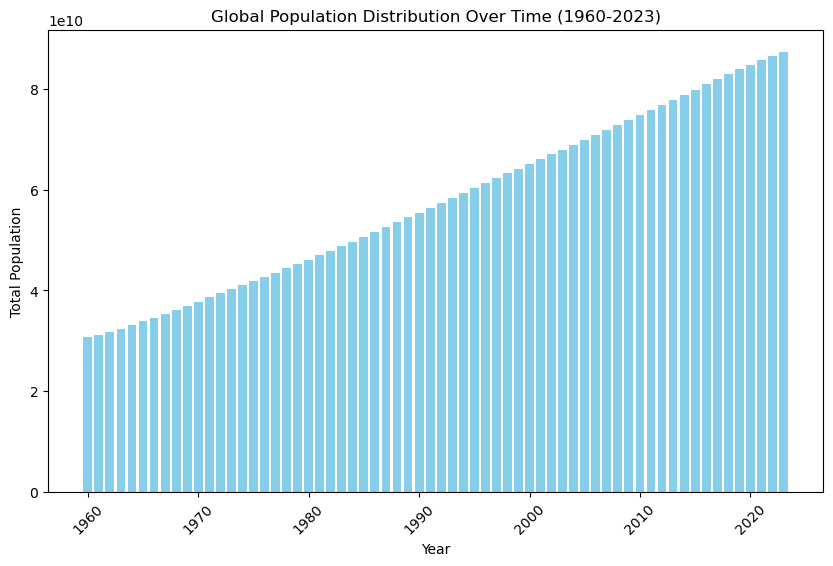

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(total_population.index, total_population.values, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Global Population Distribution Over Time (1960-2023)")
plt.xticks(rotation=45)
plt.show()

In [11]:
year_columns = [col for col in data.columns if col.isdigit()]

In [12]:
top_10_countries = data.set_index("Country Name")[year_columns].sum(axis=1).nlargest(10)

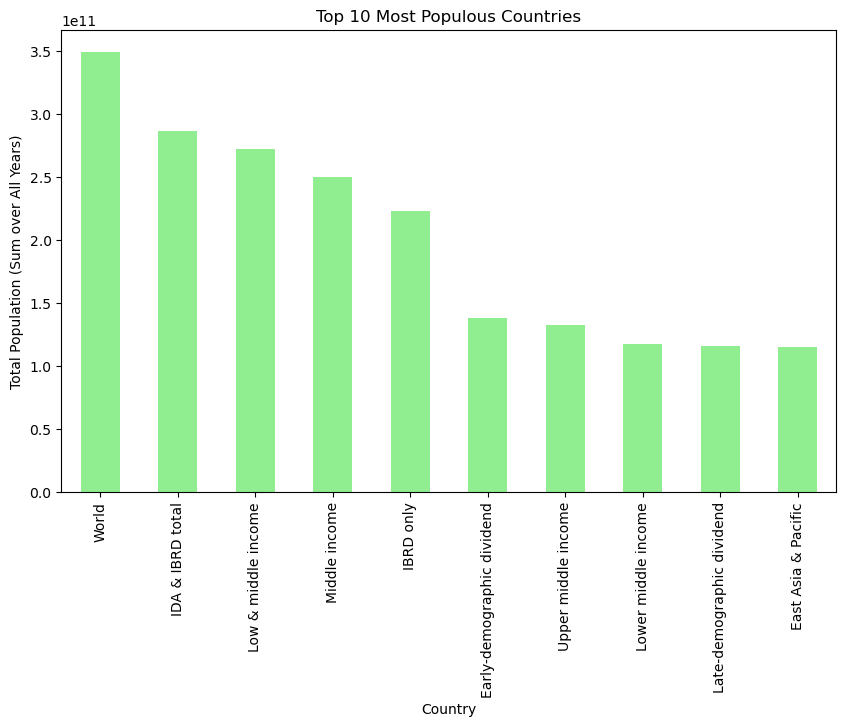

In [13]:
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind="bar", color="lightgreen")
plt.ylabel("Total Population (Sum over All Years)")
plt.xlabel("Country")
plt.title("Top 10 Most Populous Countries")
plt.show()

### Loading metadata country and indicator datasets

In [14]:
metadata_country=pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv") 
metadata_country.head() 

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [15]:
metadata_indicator=pd.read_csv("Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv") 
metadata_indicator

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


### Data cleaning and merging


In [16]:
metadata_country = metadata_country.drop(columns=["Unnamed: 5"], errors="ignore")
metadata_indicator=metadata_indicator.drop(columns=["Unnamed: 4"],errors="ignore") 

In [17]:
# Merging population data and metadata country data
data_merged = data.merge(metadata_country, left_on="Country Code", right_on="Country Code", how="left")
data_merged

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,2021,2022,2023,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,Latin America & Caribbean,High income,NaN,Aruba
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0,Europe & Central Asia,Upper middle income,NaN,Kosovo
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep."
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [18]:
# Checking missing values
data_merged.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                0
                 ... 
2023                0
Region             49
IncomeGroup        50
SpecialNotes      139
TableName           1
Length: 72, dtype: int64

#### Handling missing values

In [19]:
data_merged.drop(columns=['SpecialNotes'], inplace=True)

In [20]:
data_merged['Region'].fillna(data_merged['Region'].mode()[0], inplace=True)
data_merged['IncomeGroup'].fillna(data_merged['IncomeGroup'].mode()[0], inplace=True) 
data_merged['TableName'].fillna(data_merged['TableName'].mode()[0], inplace=True)

### EDA

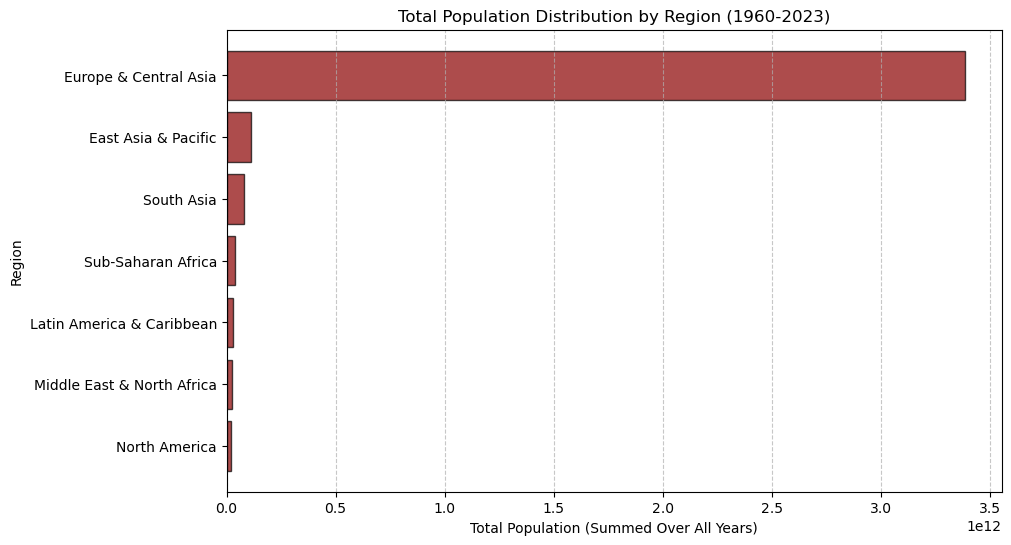

In [21]:
# Bar plot of categorical variable
region_population = data_merged.groupby("Region").sum(numeric_only=True).sum(axis=1).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(region_population.index, region_population.values, color='darkred', edgecolor='black', alpha=0.7)
plt.xlabel("Total Population (Summed Over All Years)")
plt.ylabel("Region")
plt.title("Total Population Distribution by Region (1960-2023)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


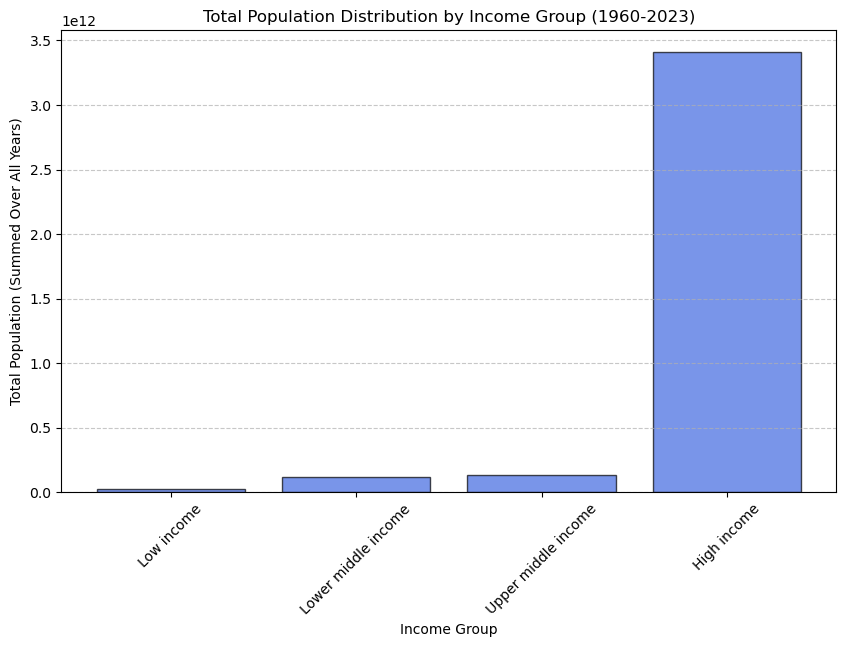

In [22]:
# Bar plot of categorical variable
income_population = data_merged.groupby("IncomeGroup").sum(numeric_only=True).sum(axis=1).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(income_population.index, income_population.values, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel("Income Group")
plt.ylabel("Total Population (Summed Over All Years)")
plt.title("Total Population Distribution by Income Group (1960-2023)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Conclusion
This project successfully analyzed global population trends over time, highlighting key patterns in demographic changes. The study identified the top 10 most populous countries based on total population across all years and examined population distributions across different regions and income levels.

Key insights include:

- A steady increase in global population over the years, with significant growth in certain regions.
- The top 10 most populous countries contributing a substantial share of the world's total population.
- The role of economic factors in population distribution, as observed through income-based analysis.

Through data cleaning, handling missing values, and exploratory visualizations, we provided a clearer understanding of how global demographics have evolved.